In [2]:
import numpy as np
import pandas as pd
import sklearn

In [4]:
sklearn.__version__

'1.0.2'

# 1. Linear Regression
### 공부 시간에 따른 시험 점수

In [3]:
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('data/LinearRegressionData.csv')

In [5]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 선형 회귀로 객체 생성
reg.fit(X, y) #fit은 학습을 하며 모델 생성

LinearRegression()

In [26]:
y_pred = reg.predict(X) #X에 대한 예측 값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

Text(0, 0.5, 'score')

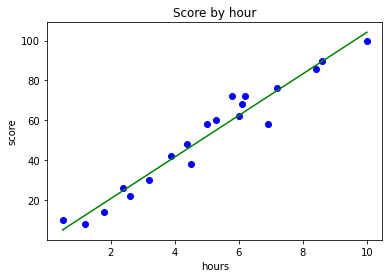

In [36]:
plt.scatter(X, y, color='blue') #산점도
plt.plot(X, y_pred, color = 'green') # plot은 선그래프
plt.title('Score by hour') #제목
plt.xlabel('hours')
plt.ylabel('score')

In [39]:
print('9시간 공부했을 때 예상 점수 : ', reg.predict([[9]])) #2차원 배열로 넣어주는 것이 핵심

9시간 공부했을 때 예상 점수 :  [93.77478776]


In [40]:
reg.coef_ # 기울기

array([10.44369694])

In [42]:
reg.intercept_ #y절편

-0.21848470286721522

y = mx + b => y = 10.4446x - 0.2184 

### 데이터 세트 분리
(훈련세트와 테스트세트는 8:2 비율로)

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv('data/LinearRegressionData.csv')

In [6]:
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [9]:
from sklearn.model_selection import train_test_split #튜플형태로 값이 4개가 가져와짐(X_train, X_test, y_train, y_test )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #훈련 80 : 테스트 20

In [13]:
X_train, len(X_train) #훈련데이터 확인해보기

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [17]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [19]:
y_test, len(y_test)

(array([ 90,   8, 100,  38], dtype=int64), 4)

In [23]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

### 분리된 데이터를 통한 모델링

In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [29]:
reg.fit(X_train, y_train) #훈련세트로 예측

LinearRegression()

### 데이터 시각화

Text(0, 0.5, 'score')

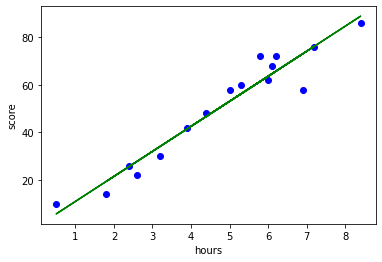

In [60]:
plt.scatter(X_train, y_train, color='blue') #산점도
plt.plot(X_train, reg.predict(X_train), color='green')
plt.xlabel('hours')
plt.ylabel('score')

### 데이터 시각화 (테스트 세트)

Text(0, 0.5, 'score')

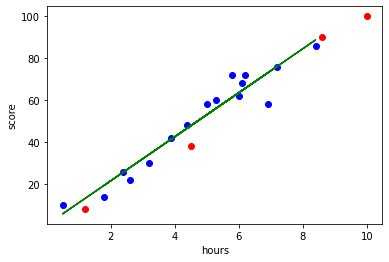

In [61]:
plt.scatter(X_train, y_train, color='blue') #산점도
plt.plot(X_train, reg.predict(X_train), color='green')
plt.scatter(X_test, y_test, color='red')
plt.xlabel('hours')
plt.ylabel('score')

In [62]:
reg.coef_

array([10.49161294])

In [63]:
reg.intercept_

0.6115562905169796

### 모델 평가

In [64]:
reg.score(X_test, y_test) #테스트 세트를 통한 모델 평가

0.9727616474310156

In [65]:
reg.score(X_train, y_train) #훈련 세트를 통한 모델 평가

0.9356663661221668

## 2. 경사 하강법(Gradient Descent)
#### 잔차 제곱의 합 : RSS (Residual Sum of Squares)
#### 최소 제곱법 : OLS (Ordinary Least Squares)
#### sum(y-y')2

max_iter : 훈련 세트 반복 횟수(Epoch 횟수)
eta0 : 학습률 (learning rate)

In [96]:
from sklearn.linear_model import SGDRegressor # SGD : Stochastic Gradient Descent 확률적 경사 하강법

#지수 표기법
# 1e-3 : 0.001 (10^-3)
# 1e-4 : 0.0001 (10^-4)
# 1e+3 : 1000 (10^3)
# 1e+4 : 10000 (10^4)

sr = SGDRegressor()
# sr = SGDRegressor(max_iter=2000, eta0=1e-4, random_state=0, verbose=1)
# 손실함수가 만들어지는 과정을 확인 가능
sr.fit(X_train, y_train)

SGDRegressor()

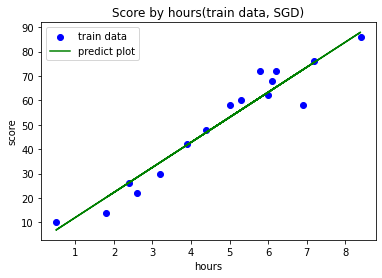

In [97]:
plt.scatter(X_train, y_train, color='blue', label='train data') #산점도
plt.plot(X_train, sr.predict(X_train), color='green', label='predict plot')
plt.title('Score by hours(train data, SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.legend()
plt.show()

In [98]:
sr.coef_, sr.intercept_

(array([10.24852505]), array([1.80793173]))

In [99]:
sr.score(X_test, y_test) #테스트 세트를 통한 모델 평가

0.9728622547608997

In [100]:
sr.score(X_train, y_train) #테스트 세트를 통한 모델 평가

0.9351599689547135

결석 횟수와 공부 장소까지 포함

## One-Hot Encoding

다중 공선성 Multicollinearity
하나의 피처가 다른 피처에 영향을 미침 Home, Library, Cafe 라는 장소 3가지가 있을 때,
D1(Home)+D2(Library)+D3(Cafe) = 1 -> D3 = 1-(D1+D2)
이 뜻은 독립변수 사이에 상관 관계가 있다는 뜻임.(실질적으로 있을 가능성은 낮지만 있을 수는 있음)
그렇기 때문에 D3를 지움으로 써 1,0은 D1, 0,1은 D2, 0,0은 D3가 되어 상관관계가 사라짐